# Prepare the Data

## Load Dataset

In [1]:
# load dataset and split features and labels
import pandas as pd

df = pd.read_csv('./data/Suicide ideation.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head(5)

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


## EDA

### Check missing value

In [2]:
null_check = df.isnull().sum()
print(null_check)

text     0
class    0
dtype: int64


### Describe Data

In [3]:
# Describe the dataset
df["num_token"] = df['text'].apply(lambda t: len(t.split()))
print(df.groupby("class")["num_token"].describe())

                count        mean         std  min   25%    50%    75%     max
class                                                                         
non-suicide  116037.0   61.188302  139.292553  2.0  19.0   31.0   60.0  8220.0
suicide      116037.0  202.662168  255.309193  1.0  60.0  127.0  251.0  9684.0


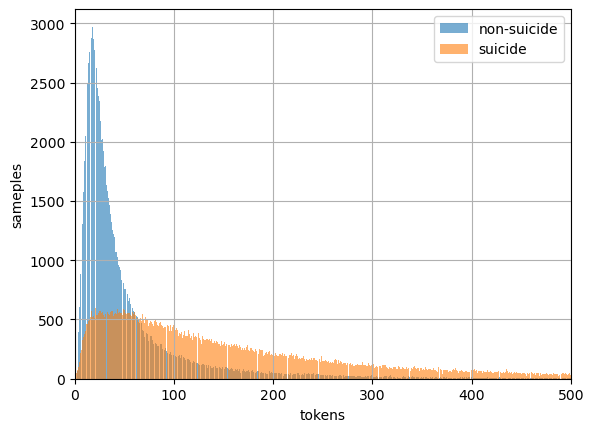

In [4]:
# Plot the relation between 'samples' and 'tokens'
import matplotlib.pyplot as plt

df.groupby("class")["num_token"].hist(bins=10000, legend=True, alpha=0.6)
plt.xlim(0, 500)
plt.xlabel("tokens")
plt.ylabel("sameples")
plt.savefig('./img/data_describe.jpg')
plt.show()

### Word Cloud

In [5]:
suicide=df[df['class']=='suicide']['text']
nsuicide=df[df['class']=='non-suicide']['text']

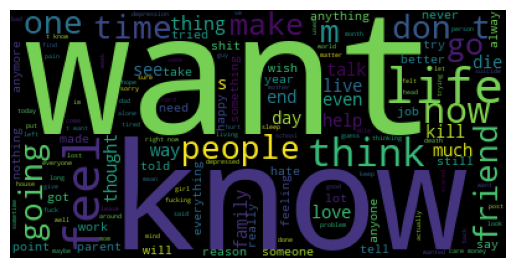

In [6]:
from wordcloud import WordCloud

wc = WordCloud(background_color="black", max_words=1000, random_state=60)
plt.imshow(wc.generate(' '.join(suicide)))
plt.axis('off')
plt.savefig('./img/wc_suicide.jpg', bbox_inches='tight', dpi=300, pad_inches=0)
plt.show()

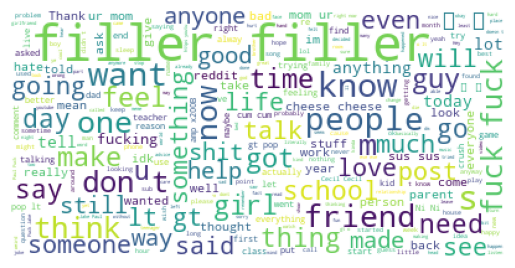

In [7]:
wc = WordCloud(background_color="white", max_words=1000, random_state=60)
plt.imshow(wc.generate(' '.join(nsuicide)))
plt.axis('off')
plt.savefig('./img/wc_nonsuicide.jpg',  bbox_inches='tight', dpi=300, pad_inches=0)
plt.show()

## Data cleaning

make labels to 0 or 1

In [8]:
# Drop the num_token column
df = df.drop(columns="num_token")

# Get dummy variables of the class column
df = pd.concat([df, pd.get_dummies(df["class"], drop_first=True, dtype=int)], axis=1).drop(columns="class")
df.head()

,text,suicide
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1


In [9]:
# Lowercasing
df['text'] = df['text'].str.lower()
# Normalizing '
df['text'] = df['text'].str.replace("’", "'")

### Replace Abbreviations

In [10]:
import re
abb = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "dont": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "idk": "i do not know",
  "he'd've": "he would have",
  "he'll": "he will",  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is", "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have", "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",      "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have", "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have", "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

abb_re = re.compile('(%s)' % '|'.join(abb.keys()))

def expandContractions(text, abb_re=abb_re):
    def replace(match):
        return abb[match.group(0)]
    return abb_re.sub(replace, text)

df['text'] = df['text'].apply(expandContractions)
df.head()

,text,suicide
0,ex wife threatening suiciderecently i left my ...,1
1,am i weird i do not get affected by compliment...,0
2,finally 2020 is almost over... so i can never ...,0
3,i need helpjust help me im crying so hard,1
4,"i am so losthello, my name is adam (16) and i ...",1


### Remove URL, mail, emoji and Special Characters

In [11]:
def remove_url(text):
    url_pattern = re.compile(r'http\S+')
    return re.sub(url_pattern, '', text)

def remove_mail(text):
    mail_pattern = re.compile(r'\S+@S+')
    return re.sub(mail_pattern, '', text)

def remove_emoji(text):
    emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FE00-\U0001FE0F\U0001F004]+')
    return re.sub(emoji_pattern, '', text)

# Function to remove special characters from each word in a list
def remove_special(text):
    sc_pattern = re.compile(r'\s+')
    return re.sub(sc_pattern, ' ', text)

df['text'] = df['text'].apply(remove_emoji)
df['text'] = df['text'].apply(remove_mail)
df['text'] = df['text'].apply(remove_special)
df['text'] = df['text'].apply(remove_url)

### Remove Stop Words

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')

def remove_stopword(text):
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop]
    return ' '.join(filtered)

df['text'] = df['text'].apply(remove_stopword)

In [13]:
df.head()

,text,suicide
0,ex wife threatening suiciderecently left wife ...,1
1,weird get affected compliments coming someone ...,0
2,finally 2020 almost ... never hear `` 2020 bad...,0
3,need helpjust help im crying hard,1
4,"losthello , name adam ( 16 ) struggling years ...",1


### Drop Missing Values

In [14]:
import numpy as np

df.replace('', np.nan, inplace=True)

null_check = df.isnull().sum()
print(null_check)

text       11
suicide     0
dtype: int64


In [15]:
df.dropna(inplace=True)

null_check = df.isnull().sum()
print(null_check)

text       0
suicide    0
dtype: int64


### Word Cloud of Pre-processed Data

In [16]:
suicide=df[df['suicide']==1]['text']
nsuicide=df[df['suicide']==0]['text']

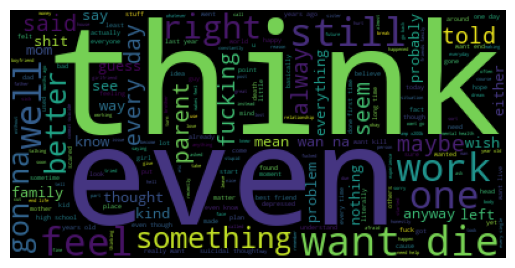

In [17]:
wc = WordCloud(background_color="black", max_words=1000, random_state=60)
plt.imshow(wc.generate(' '.join(suicide)))
plt.axis('off')
plt.savefig('./img/wc_suicide_c.jpg', bbox_inches='tight', dpi=300, pad_inches=0)
plt.show()

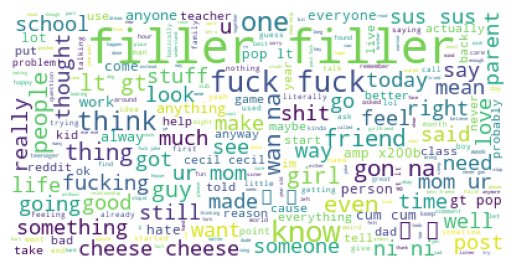

In [18]:
wc = WordCloud(background_color="white", max_words=1000, random_state=60)
plt.imshow(wc.generate(' '.join(nsuicide)))
plt.axis('off')
plt.savefig('./img/wc_nonsuicide_c.jpg',  bbox_inches='tight', dpi=300, pad_inches=0)
plt.show()

## Split data into training set and test set

In [19]:
# split dataset
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=60)

In [20]:
print("Shape of training dataset:", train.shape)
print("Shape of testing dataset:", test.shape)

Shape of training dataset: (185650, 2)
Shape of testing dataset: (46413, 2)


## Export datasets

In [21]:
train.to_csv('./data/train.csv')
test.to_csv('./data/test.csv')